# Titanic dataset

This assigment consists of the introductory problem [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). The goal is to train a classifier to predict persons that have survived the disaster. 

We will start by reading in the, by now standard, Titanic dataset. It contains information about passengers of the Titanic. The information includes i.a. sex, age, name  and passenger class as well as information if the passenger survived or died in the disaster. You can find more details about this data set [here](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf). 

The data  is in "coma separated values" (csv) format and to read it we will use the [pandas](https://pandas.pydata.org) library. Pandas  provides tools for manipulating  data frames and series and is wildly used in data science projects. 

Please note that this is NOT a pandas manual. For detailed explanation of the concepts and functions used here you should consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html). 

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [300]:
data_all = pd.read_csv("titanic3.csv")

`data_all` is a pandas  [_DataFrame_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object. 

In [301]:
type(data_all)

pandas.core.frame.DataFrame

We can check what attributes are stored in the DataFrame by listing the column names:

In [302]:
data_all.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

or get a quick preview using ```head``` function: 

In [303]:
data_all.head(2)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


For the description of those features please see the before mentioned [link](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf). 

Another usefull function is ```info```:

In [304]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null int64
survived      1309 non-null int64
name          1309 non-null object
sex           1309 non-null object
age           1046 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
ticket        1309 non-null object
fare          1308 non-null float64
cabin         295 non-null object
embarked      1307 non-null object
boat          486 non-null object
body          121 non-null float64
home.dest     745 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


As we can see not all attributes are known (non-null) for every passanger. This is a frequent situation in real datasets. 

In [305]:
data_all.survived.value_counts()/len(data_all)

0    0.618029
1    0.381971
Name: survived, dtype: float64

In [306]:
### Train/test split

As in every machine learning problem we should split our data into training and testing sets.

In [307]:
from sklearn.model_selection import train_test_split

In [308]:
seed =5657
data, test_data = train_test_split(data_all, train_size=0.8, stratify=data_all.survived, random_state=seed)

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 207 to 1206
Data columns (total 15 columns):
Unnamed: 0    1047 non-null int64
pclass        1047 non-null int64
survived      1047 non-null int64
name          1047 non-null object
sex           1047 non-null object
age           845 non-null float64
sibsp         1047 non-null int64
parch         1047 non-null int64
ticket        1047 non-null object
fare          1046 non-null float64
cabin         242 non-null object
embarked      1045 non-null object
boat          389 non-null object
body          92 non-null float64
home.dest     608 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 130.9+ KB


In [310]:
data.survived.value_counts()/len(data)

0    0.617956
1    0.382044
Name: survived, dtype: float64

In [311]:
test_data.survived.value_counts()/len(test_data)

0    0.618321
1    0.381679
Name: survived, dtype: float64

## Problem 1

__a) Implement a Bayes classifier for predicting passenger survival  using sex and pclass  features.__

Actually this problem will be solved for you below to serve as an tutorial on pandas :) 

#### Preliminaries

We will start by extracting from the frame  only the information we need:

In [312]:
data_selected = data[['pclass', 'sex', 'survived']]

In [313]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 207 to 1206
Data columns (total 3 columns):
pclass      1047 non-null int64
sex         1047 non-null object
survived    1047 non-null int64
dtypes: int64(2), object(1)
memory usage: 32.7+ KB


In [314]:
data_selected.head(5)

,pclass,sex,survived
207,1,female,1
363,2,male,0
966,3,female,0
1292,3,male,0
118,1,male,0


In [315]:
grouped = data_selected.groupby(['survived','sex','pclass'])

We can count the number of passegers in each group using function ```size```:

First we need to group passengers according to sex, class and survival status. This can be achieved using  the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function:

In [316]:
counts = grouped.size()

Object ```counts``` contains all the information that we need to construct the classifier:

In [317]:
counts

survived  sex     pclass
0         female  1           3
                  2          10
                  3          81
          male    1          95
                  2         125
                  3         333
1         female  1         120
                  2          72
                  3          85
          male    1          45
                  2          17
                  3          61
dtype: int64

`counts` is a pandas [_Series_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) object indexed by a [_MultiIndex_](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical).

In [318]:
counts.index

MultiIndex([(0, 'female', 1),
            (0, 'female', 2),
            (0, 'female', 3),
            (0,   'male', 1),
            (0,   'male', 2),
            (0,   'male', 3),
            (1, 'female', 1),
            (1, 'female', 2),
            (1, 'female', 3),
            (1,   'male', 1),
            (1,   'male', 2),
            (1,   'male', 3)],
           names=['survived', 'sex', 'pclass'])

We can treat a multi-indexed series as an multi-dimensional table with each level of the index corresponding to one dimension. You can index `counts` to obtain information on specified entry: 

In [319]:
counts[1,'female',2]

72

The index is hierarchical, if we do not provide all indices, a subset of elements will be returned e.g. 

In [320]:
counts[1,'female']

pclass
1    120
2     72
3     85
dtype: int64

list the number of male surviving women  in each class. Similarly 

In [321]:
counts[1]

sex     pclass
female  1         120
        2          72
        3          85
male    1          45
        2          17
        3          61
dtype: int64

lists the number of survivors for each sex and class.

It is however better to use the `loc` function. With this function we can also use the _slicing_ notation. For example 

In [322]:
counts.loc[0, :,3]

survived  sex     pclass
0         female  3          81
          male    3         333
dtype: int64

list non-survivors in third class  regardless of sex. 

Both `[]` and `loc[]` can  also take a _tuple_ as an argument: 

In [323]:
counts.loc[(0, 'female',3)]

81

but the use of slice notation in tuple is not permitted. You can use it by providing an explicit _slice_ object 

In [324]:
counts.loc[(0, slice(None),3)]

survived  sex     pclass
0         female  3          81
          male    3         333
dtype: int64

Function `sum`  as expected returns the sum of all the entries of the series

In [325]:
n_passengers = counts.sum()
n_survivors = counts[1].sum()
n_dead = counts[0].sum()

print(n_passengers, n_survivors, n_dead)
print(n_survivors+n_dead==n_passengers)

1047 400 647
True


### Classifier

To implement classifier we need to calculate the conditional probability of survival given sex and class:

$$P(survived|sex, pclass)$$

$survived$ here is the label taht can take two values 0 for dead and 1 fro survivors, but we can  calculate only the survival probability because of the realation

$$P(survived=1|sex, pclass)+P(survived=0|sex, pclass)=1$$

We can use the Bayes theorem but it will be actually quicker to calculate it directly from the definition:

$$P(survived|sex, pclass)=\frac{P(survived,sex, pclass)}{P(sex, pclass)}
\approx \frac{\#(survived,sex, pclass)}{\#(sex,pclass)}$$

where by $\#$ I have denoted the number of passengers with given attributes. For example the probability of survival for a women traveling in second class is: 

$$\frac{\text{number of women in second class that survived}}{\text{number of women in second class}}$$

which we can calculate as

In [326]:
counts[(1,'female',2)]/(counts[(1,'female',2)]+counts[(0,'female',2)])

0.8780487804878049

This operation has to be repeated for every sex and class combination. We do not have to do it index by index. Pandas have overloaded arithmetic operations that work  on all indices at once e.g. 

In [327]:
by_sex_class = counts.loc[0]+counts.loc[1]

creates a series with number of passengers of each gender and class

In [328]:
by_sex_class

sex     pclass
female  1         123
        2          82
        3         166
male    1         140
        2         142
        3         394
dtype: int64

Same effect can be achieved by passing `level` argument to the series `sum` function. The level argument lists the levels which are __not__ summed over. In other words those are the levels left after summation. To sum over the `survived` level we use

In [329]:
by_sex_class = counts.sum(level=['sex','pclass'])

Using `counts` and `by_sex_class` you can calculate required conditional propabilities. 

In [330]:
p_surv_cond_sex_pclass = (counts/by_sex_class)
p_surv_cond_sex_pclass = p_surv_cond_sex_pclass.reorder_levels(['survived','sex','pclass']).sort_index()

In [331]:
p_surv_cond_sex_pclass

survived  sex     pclass
0         female  1         0.024390
                  2         0.121951
                  3         0.487952
          male    1         0.678571
                  2         0.880282
                  3         0.845178
1         female  1         0.975610
                  2         0.878049
                  3         0.512048
          male    1         0.321429
                  2         0.119718
                  3         0.154822
dtype: float64

In the above expression we have used a very useful feature of pandas series. When performing an arithmetic operation  the elements of the series are _joined_ based on the common index levels.  

`counts` have three levels of index

In [332]:
counts.index.names

FrozenList(['survived', 'sex', 'pclass'])

and `by_sex_class` has two

In [333]:
by_sex_class.index.names

FrozenList(['sex', 'pclass'])

Levels 'sex' and 'pclass' are common to both indexes so the expression

```p_surv_cond_sex_pclass = (counts/by_sex_class)```

will have a three level index with  levels 'survived', 'sex' and 'pclass'  and is equivalent to:

In [334]:
p_surv_cond_sex_pclass = pd.Series(0,index=counts.index)
for survived, sex, pclass in counts.index: 
    p = counts.loc[survived, sex, pclass]/by_sex_class.loc[sex, pclass]
    p_surv_cond_sex_pclass.loc[(survived, sex, pclass)] = p

Unfortunately this join operation also reorders the levels of the multi index so we have to order them back using `reorder_levels` and `sort_index` function.

```p_surv_cond_sex_pclass = (counts/by_sex_class).reorder_levels(['survived','sex','pclass']).sort_index()```

We can check that we indeed get the identical values

In [335]:
p_surv_cond_sex_pclass.sum(level=['sex', 'pclass'])

sex     pclass
female  1         1.0
        2         1.0
        3         1.0
male    1         1.0
        2         1.0
        3         1.0
dtype: float64

#### b) Calculate TPR and FPR on the train and test set. Draw the ROC curve and calculate AUC score

The TPR is the fraction of survivors that were classified as survivors. And FPR is the fraction of dead persons that were classified as survivors. We classify a person as survivor when the probability of survival is  greater or equal to one half. 

For ROC and AUC use the functions from scikit-learn library.

In [336]:
from sklearn.metrics import roc_auc_score, roc_curve

###### Calculate for the train set

Extract the real number of the survived:

In [337]:
survived_real = data_selected['survived']

Probability of survival for each passenger:

In [338]:
def calc_surv_probs(p_series, data, features):
    cols = (data[f] for f in features)
    probs = np.array([p_series[1].loc[c] for c in zip(*cols)])
    return probs

In [339]:
surv_probs = calc_surv_probs(p_surv_cond_sex_pclass, data_selected, ['sex', 'pclass'])
surv_probs

array([0.97560976, 0.11971831, 0.51204819, ..., 0.51204819, 0.15482234,
       0.15482234])

As given in the task, we classify a person as survivor when the probability of survival is greater or equal to one half, so:

In [340]:
surv_probs_classified = (surv_probs>=0.5)

The fraction of survivors that were classified as survivors:

In [341]:
(survived_real==surv_probs_classified).sum()/n_passengers

0.792741165234002

TPR and FPR:

In [342]:
test_surv_probs_classified = (test_surv_probs>=0.5)

In [343]:
def tpr_fpr(real, predicted):
    all_positive = (real==1).sum()
    all_negative = (real==0).sum()
    
    tpr = 1 - ((real > predicted).sum()/all_positive)
    fpr = (real < predicted).sum()/all_negative
    return tpr, fpr

tpr, fpt = tpr_fpr(survived_real, surv_probs_classified)
print("TPR: "+str(tpr))
print("FPR: "+str(fpr))

TPR: 0.6925
FPR: 0.14528593508500773


ROC curve:

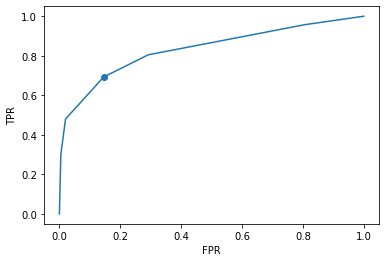

In [344]:
fprs, tprs, thds = roc_curve(survived_real, surv_probs)

plt.scatter([fpr], [tpr])
plt.plot(fprs, tprs)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

AUC:

In [345]:
auc = roc_auc_score(survived_real, surv_probs)
print("AUC: "+str(auc))

AUC: 0.8327163833075735


###### Calculate for the test set

In [346]:
test_data_selected = test_data[['pclass', 'sex', 'survived']]

In [347]:
test_grouped = test_data_selected.groupby(['survived','sex','pclass'])

In [348]:
test_counts = test_grouped.size()

In [349]:
test_n_passengers = test_counts.sum()
test_n_survivors = test_counts[1].sum()
test_n_dead = test_counts[0].sum()

In [350]:
test_p_surv_cond_sex_pclass = pd.Series(0,index=test_counts.index)
for survived, sex, pclass in test_counts.index: 
    p = test_counts.loc[survived, sex, pclass]/by_sex_class.loc[sex, pclass]
    p_surv_cond_sex_pclass.loc[(survived, sex, pclass)] = p

Extract the real number of the survived:

In [351]:
test_survived_real = test_data_selected['survived']

Probability of survival for each passenger:

In [352]:
test_surv_probs = calc_surv_probs(test_p_surv_cond_sex_pclass, test_data_selected, ['sex', 'pclass'])

As given in the task, we classify a person as survivor when the probability of survival is greater or equal to one half, so:

The fraction of survivors that were classified as survivors:

In [353]:
(test_survived_real==test_surv_probs_classified).sum()/test_n_passengers

0.6183206106870229

TPR and FPR:

In [354]:
test_tpr, test_fpr = tpr_fpr(test_survived_real, test_surv_probs_classified)
print("TPR: "+str(test_tpr))
print("FPR: "+str(test_fpr))

TPR: 0.0
FPR: 0.0


ROC curve:

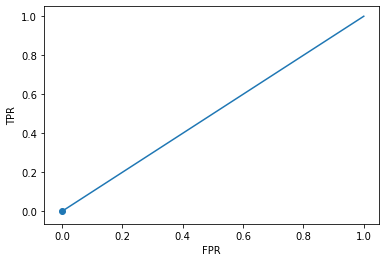

In [355]:
test_fprs, test_tprs, test_thds = roc_curve(test_survived_real, test_surv_probs)

plt.scatter([test_fpr], [test_tpr])
plt.plot(test_fprs, test_tprs)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

AUC:

In [356]:
auc = roc_auc_score(test_survived_real, test_surv_probs)
print("AUC: "+str(auc))

AUC: 0.5


#### c) Are those features conditionally independent? 

To answer this question we need to compare conditional probability distribution

$$P(sex,pclass|survived)$$

with

$$P(sex|survived)\times P(pclass|survived)$$ 

Please note that $survived$ is actually a label for the survival status: 1 for survived and 0 for dead. 

By definition

$$P(sex,pclass|survived)= \frac{P(sex,pclass,survived)}{P(survived)}$$

which can be calculated based on the `counts` object. 

As given by the definition:

In [357]:
p_sex_pclass_cond_survived = counts/counts.sum(level='survived')

By analogy, same goes with P(sex|survived) and P(pclass|survived)

In [358]:
p_sex_cond_survived = counts.sum(level=['survived', 'sex'])/counts.sum(level='survived')
p_pclass_cond_survived = counts.sum(level=['survived', 'pclass'])/counts.sum(level='survived')

In [359]:
multiplication = p_sex_cond_survived * p_pclass_cond_survived

Now, it's time to compare:

In [360]:
p_sex_pclass_cond_survived - multiplication

survived  sex     pclass
0         female  1        -0.017369
                  2        -0.014859
                  3         0.032228
          male    1         0.017369
                  2         0.014859
                  3        -0.032228
1         female  1         0.014344
                  2         0.025919
                  3        -0.040263
          male    1        -0.014344
                  2        -0.025919
                  3         0.040263
dtype: float64

Because the differences are non-zero, we can say that the features aren't independent.

__d) Implement a Naive bayes classifier using same features and compare it with a).__

Please calculate the FPR and TPR as well as AUC and draw the ROC curve for train and test datasets. 

We  have already calculated the probability 

$$P_{NB}(sex,pclass|survived) = P(sex|survived)\times P(pclass|survived)$$

From which we can calculate 

$$P_{NB}(survived|sex,pclass)= \frac{P_{NB}(sex,pclass|survived)P(survived)}{P_{NB}(sex,pclass)}$$

where the denominator is also calculated from the factorised probabilities

$$P_{NB}(sex,pclass)= P_{NB}(sex,pclass|survived=1)P(survived=1)+P_{NB}(sex,pclass|survived=0)P(survived=0)$$

That is very important because the result must be a probability and add up to one

$$P_{NB}(survived=1|sex,pclass)+P_{NB}(survived=0|sex,pclass)=1$$

for each sex and passenger class. 

In [361]:
p_surv = counts.sum(level='survived')/counts.sum()

In [362]:
nb_above = p_sex_pclass_cond_survived*p_surv

The denominator is actually a sum of nb_above of anything but sex and pclass, so:

In [363]:
p_nb_sex_pclass = nb_above.sum(level=['sex', 'pclass'])

And now, having them both we can get $$P_{NB}(survived|sex, pclass)$$

In [364]:
p_nb_surv_cond_sex_pclass = nb_above/p_nb_sex_pclass
p_nb_surv_cond_sex_pclass = p_nb_surv_cond_sex_pclass.reorder_levels(['survived','sex','pclass']).sort_index()

Just to be sure, we check if the result adds up to one:

In [365]:
p_nb_surv_cond_sex_pclass.sum(level=['sex', 'pclass'])

sex     pclass
female  1         1.0
        2         1.0
        3         1.0
male    1         1.0
        2         1.0
        3         1.0
dtype: float64

Now, knowing that it does, we can calculate TPR and FPR

In [366]:
nb_probs = calc_surv_probs(p_nb_surv_cond_sex_pclass, data_selected, ['sex', 'pclass'])

In [367]:
nb_classified = (nb_probs>= 0.5)

In [368]:
(survived_real==nb_classified).sum()/n_passengers

0.792741165234002

In [369]:
nb_tpr, nb_fpr = tpr_fpr(survived_real, nb_classified)
print("NB TPR: "+str(nb_tpr))
print("NB FPR: "+str(nb_fpr))

NB TPR: 0.6925
NB FPR: 0.14528593508500773


We can now also compare it with a) 

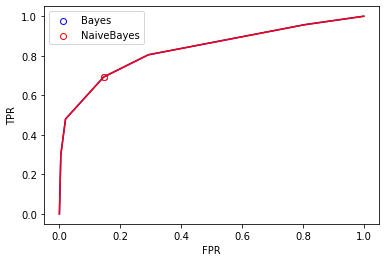

In [370]:
nb_fprs, nb_tprs, nb_thds = roc_curve(survived_real, nb_probs)

plt.scatter([nb_fpr], [nb_tpr], edgecolors='blue', facecolors='white',label='Bayes')
plt.plot(nb_fprs, nb_tprs,  c='blue')

plt.scatter([fpr], [tpr], edgecolors='red', facecolors='white',label='NaiveBayes')
plt.plot(fprs, tprs,  c='red')


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

AUC:

In [374]:
nb_auc = roc_auc_score(survived_real, nb_probs)
print("AUC: "+str(nb_auc))

AUC: 0.8327163833075735


## Problem 2

##### Add age as a feature and implement naive bayes classifier. 

Compute the FPR, TPR and AUC as well as draw the ROC curve. 

#### Hint: 
Consider using it as a categorical variable

We start by constructning a new dataframe with age added:

In [ ]:
data_with_age = data_selected.copy()

In [ ]:
data_with_age['age'] = data['age']

###  Missing values ! :( 

Unfortunatelly there is a problem. Not all passengers have their age assigned, as we can check by inspecting the dataframe:

In [ ]:
data_with_age.info()

We can see that there are only 1046 non-null entries for 'age'. We can do it also directly by using the `isna` methods

In [ ]:
data['age'].isna().sum()

This problem is unfortunatelly very common in data science and machine learning. I will present here several  methods of dealing with this problem.

First solution is to ignore the missing data _i.e._ delete all rows with missing entries. This can be easilly achieved  using `pandas.DataFrame.dropna` method:

In [ ]:
data_with_age_cleaned = data_with_age.dropna()

In [ ]:
data_with_age_cleaned.info()

Second method is to fill in the missing values. A good choice would be the  average age (or median)

In [ ]:
data_with_age_cleaned.age.mean()

In [ ]:
data_with_age_filled = data_with_age.fillna(data_with_age.age.median())

The statistical functions conveniently just disregard the missing data. 

In [ ]:
data_with_age_filled.info()

In [ ]:
data_with_age_filled.age.mean()

A more "sophisticated" method would be to will the missing values based on the group statistics e.g. average age of persons with same sex and pclass. That can be achieved using `groupby`, and `apply` methods. We could do it in one line, but I will rather do it step by step. 

We start by grouping  data by sex and pclass. We do not group by survived, those are the labels and after training we would not have access to them. 

In [ ]:
grouped = data_with_age.groupby(['sex', 'pclass'])

Now we would like to take each group, calculate the mean age, and use it to fill the 'na" values in the group. This can be achieved using the `apply` method

In [ ]:
data_with_age_group_filled = grouped.apply(
    lambda g: g.fillna({'age':g.age.mean()})
                        )

The `apply` method takes a function as argument. This functions expects a DataFrame and returs a DataFrame. The groups are passed one by one to this function and the results are assempled together back into the resulting  dataframe.

In [ ]:
data_with_age_group_filled.info()

In [ ]:
data_with_age_group_filled.age.mean()

The last method would be to treat the missing data as separate age category. 

Now we will divide age into categories. Just for fun I will define a function that returns a categorizing function

In [ ]:
def make_age_categorizer(limits, lbls):
    def categorizer(age):
        if not pd.isna(age):
            for i,l in enumerate(limits):
                if age<=l:
                    return lbls[i]
            return lbls[-1]    
        else:
            return 'unc'

    return categorizer
    

Somewhat arbitrarly I will classify all younger then 12 years as children, between 12 and 60 as adults and older as seniors

In [ ]:
ctg = make_age_categorizer([12,60],['child','adult','senior'])

We can use the `cgt` function to add new column containing age categories to dataframe

In [ ]:
data_with_age['age_category']=data_with_age.age.apply(ctg)

and group it by all categories

In [ ]:
counts_with_age = data_with_age.groupby( ['survived', 'sex', 'pclass', 'age_category']).size()

In [ ]:
counts_with_age

From now on we can proceed as before